In this notebook, I compare the VSH parameters based on the bright and faint sample.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from my_progs.catalog.vec_mod import vec_mod_calc
%matplotlib inline
%config InlineBackend.figure_format = "svg"


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
majorLocator = MultipleLocator(50)
name01 = ["$G_1$", "$G_2$", "$G_3$", "$R_1$", "$R_2$", "$R_3$"]
name02 = ["$E_{22}^R$", "$E_{22}^I$", "$E_{21}^R$", "$E_{21}^I$", "$E_{20}$",
         "$M_{22}^R$", "$M_{22}^I$", "$M_{21}^R$", "$M_{21}^I$", "$M_{20}$"]


barwidth = 0.2
loc = 0.2

pos1 = np.arange(len(name01)) - 1 * loc
bgt_pos1 = np.arange(len(name01))
fnt_pos1 = np.arange(len(name01)) + 1 * loc

pos2 = np.arange(len(name02)) - 1 * loc
bgt_pos2 = np.arange(len(name02))
fnt_pos2 = np.arange(len(name02)) + 1 * loc

For ICRF3 S/X

In [3]:
pmt3sx, err3sx = np.genfromtxt("../logs/icrf3sx_gaiadr2_vsh02.log",
                               usecols=(1, 2), skip_header=1, unpack=True)
pmt3sxbgt, err3sxbgt = np.genfromtxt("../logs/icrf3sx_gaiadr2_bgt_vsh02.log",
                                     usecols=(1, 2), skip_header=1, unpack=True)
pmt3sxfnt, err3sxfnt = np.genfromtxt("../logs/icrf3sx_gaiadr2_fnt_vsh02.log",
                                     usecols=(1, 2), skip_header=1, unpack=True)

pmt3sx = -pmt3sx
pmt3sxbgt = -pmt3sxbgt
pmt3sxfnt = -pmt3sxfnt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


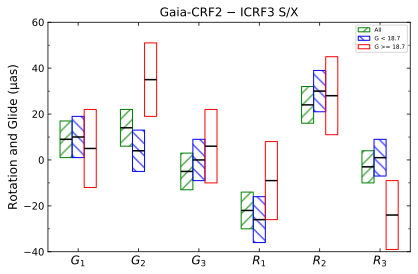

In [4]:
# Rotation and Glide
fig, ax = plt.subplots()
ax.bar(pos1, 2 * err3sx[:6], bottom=pmt3sx[:6]-err3sx[:6], width=barwidth,
       fill=False, edgecolor="g", label="All", hatch="//")
ax.bar(bgt_pos1, 2 * err3sxbgt[:6], bottom=pmt3sxbgt[:6]-err3sxbgt[:6], width=barwidth,
       fill=False, edgecolor="b", label="G < 18.7", hatch="\\\\")
ax.bar(fnt_pos1, 2 * err3sxfnt[:6], bottom=pmt3sxfnt[:6]-err3sxfnt[:6], width=barwidth,
       fill=False, edgecolor="r", label="G >= 18.7")

ax.hlines(pmt3sx[:6], pos1-0.5*barwidth, pos1+0.5*barwidth, color="k")
ax.hlines(pmt3sxbgt[:6], bgt_pos1-0.5*barwidth, bgt_pos1+0.5*barwidth, color="k")
ax.hlines(pmt3sxfnt[:6], fnt_pos1-0.5*barwidth, fnt_pos1+0.5*barwidth, color="k")

ax.set_xticks(bgt_pos1)
ax.set_xticklabels(name01, fontsize=12)

ax.set_xlim([-0.5, len(pos1)-0.5])
ax.set_ylim([-40, 60])

ax.set_ylabel("Rotation and Glide ($\\mathrm{\mu as}$)", fontsize=12)

ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.yaxis.set_minor_locator(minorLocator)

ax.set_title("Gaia-CRF2 $-$ ICRF3 S/X")
ax.legend(fontsize="xx-small")

plt.tight_layout()
plt.savefig("../plots/gcrf2-bgt-fnt-icrf3sx-vsh01.eps", hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


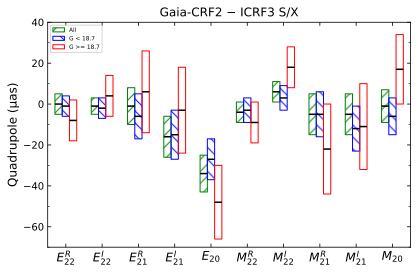

In [5]:
# Quadrupole
fig, ax = plt.subplots()
ax.bar(pos2, 2 * err3sx[6:], bottom=pmt3sx[6:]-err3sx[6:], width=barwidth,
       fill=False, edgecolor="g", label="All", hatch="//")
ax.bar(bgt_pos2, 2 * err3sxbgt[6:], bottom=pmt3sxbgt[6:]-err3sxbgt[6:], width=barwidth,
       fill=False, edgecolor="b", label="G < 18.7", hatch="\\\\")
ax.bar(fnt_pos2, 2 * err3sxfnt[6:], bottom=pmt3sxfnt[6:]-err3sxfnt[6:], width=barwidth,
       fill=False, edgecolor="r", label="G >= 18.7")

ax.hlines(pmt3sx[6:], pos2-0.5*barwidth, pos2+0.5*barwidth, color="k")
ax.hlines(pmt3sxbgt[6:], bgt_pos2-0.5*barwidth, bgt_pos2+0.5*barwidth, color="k")
ax.hlines(pmt3sxfnt[6:], fnt_pos2-0.5*barwidth, fnt_pos2+0.5*barwidth, color="k")

ax.set_xticks(bgt_pos2)
ax.set_xticklabels(name02, fontsize=12)
ax.set_xlim([-0.5, len(pos2)-0.5])
ax.set_ylim([-70, 40])
ax.set_ylabel("Quadrupole ($\\mathrm{\mu as}$)", fontsize=12)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
# ax.yaxis.grid(lw=0.1)  # horizontal lines
ax.yaxis.set_minor_locator(minorLocator)
ax.set_title("Gaia-CRF2 $-$ ICRF3 S/X")
ax.legend(fontsize="xx-small")

plt.tight_layout()
plt.savefig("../plots/gcrf2-bgt-fnt-icrf3sx-vsh02.eps", hbox="tight")

For ICRF3 K

In [6]:
pmt3k, err3k = np.genfromtxt("../logs/icrf3k_gaiadr2_vsh02.log",
                               usecols=(1, 2), skip_header=1, unpack=True)
pmt3kbgt, err3kbgt = np.genfromtxt("../logs/icrf3k_gaiadr2_bgt_vsh02.log",
                                     usecols=(1, 2), skip_header=1, unpack=True)
pmt3kfnt, err3kfnt = np.genfromtxt("../logs/icrf3k_gaiadr2_fnt_vsh02.log",
                                     usecols=(1, 2), skip_header=1, unpack=True)

pmt3k = -pmt3k
pmt3kbgt = -pmt3kbgt
pmt3kfnt = -pmt3kfnt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


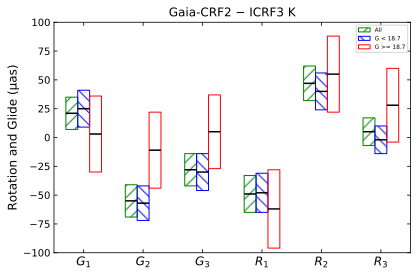

In [7]:
# Rotation and Glide
fig, ax = plt.subplots()
ax.bar(pos1, 2 * err3k[:6], bottom=pmt3k[:6]-err3k[:6], width=barwidth,
       fill=False, edgecolor="g", label="All", hatch="//")
ax.bar(bgt_pos1, 2 * err3kbgt[:6], bottom=pmt3kbgt[:6]-err3kbgt[:6], width=barwidth,
       fill=False, edgecolor="b", label="G < 18.7", hatch="\\\\")
ax.bar(fnt_pos1, 2 * err3kfnt[:6], bottom=pmt3kfnt[:6]-err3kfnt[:6], width=barwidth,
       fill=False, edgecolor="r", label="G >= 18.7")

ax.hlines(pmt3k[:6], pos1-0.5*barwidth, pos1+0.5*barwidth, color="k")
ax.hlines(pmt3kbgt[:6], bgt_pos1-0.5*barwidth, bgt_pos1+0.5*barwidth, color="k")
ax.hlines(pmt3kfnt[:6], fnt_pos1-0.5*barwidth, fnt_pos1+0.5*barwidth, color="k")

ax.set_xticks(bgt_pos1)
ax.set_xticklabels(name01, fontsize=12)
ax.set_xlim([-0.5, len(pos1)-0.5])
ax.set_ylim([-100, 100])
ax.set_ylabel("Rotation and Glide ($\\mathrm{\mu as}$)", fontsize=12)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
ax.set_title("Gaia-CRF2 $-$ ICRF3 K")
ax.legend(fontsize="xx-small")

plt.tight_layout()
plt.savefig("../plots/gcrf2-bgt-fnt-icrf3k-vsh01.eps", hbox="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


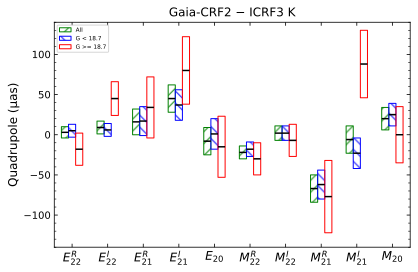

In [8]:
# Quadrupole
fig, ax = plt.subplots()
ax.bar(pos2, 2 * err3k[6:], bottom=pmt3k[6:]-err3k[6:], width=barwidth,
       fill=False, edgecolor="g", label="All", hatch="//")
ax.bar(bgt_pos2, 2 * err3kbgt[6:], bottom=pmt3kbgt[6:]-err3kbgt[6:], width=barwidth,
       fill=False, edgecolor="b", label="G < 18.7", hatch="\\\\")
ax.bar(fnt_pos2, 2 * err3kfnt[6:], bottom=pmt3kfnt[6:]-err3kfnt[6:], width=barwidth,
       fill=False, edgecolor="r", label="G >= 18.7")

ax.hlines(pmt3k[6:], pos2-0.5*barwidth, pos2+0.5*barwidth, color="k")
ax.hlines(pmt3kbgt[6:], bgt_pos2-0.5*barwidth, bgt_pos2+0.5*barwidth, color="k")
ax.hlines(pmt3kfnt[6:], fnt_pos2-0.5*barwidth, fnt_pos2+0.5*barwidth, color="k")

ax.set_xticks(bgt_pos2)
ax.set_xticklabels(name02, fontsize=12)
ax.set_xlim([-0.5, len(pos2)-0.5])
ax.set_ylim([-140, 140])
ax.set_ylabel("Quadrupole ($\\mathrm{\mu as}$)", fontsize=12)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")
# ax.yaxis.grid()  # horizontal lines
ax.yaxis.set_minor_locator(minorLocator)
ax.set_title("Gaia-CRF2 $-$ ICRF3 K")
ax.legend(fontsize="xx-small")

plt.tight_layout()
plt.savefig("../plots/gcrf2-bgt-fnt-icrf3k-vsh02.eps", hbox="tight")